In [324]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [325]:
image = cv2.imread("./ballroom_03.0.jpeg")

In [326]:
type(image)

numpy.ndarray

In [327]:
image.shape

(800, 1200, 3)

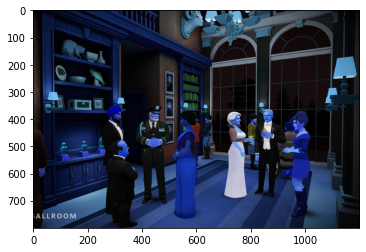

In [328]:
plt.imshow(image)

In [329]:
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

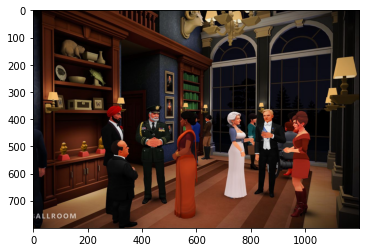

In [330]:
plt.imshow(new_image)

In [331]:
"""
1. splitting the image
"""

r,g,b = cv2.split(new_image)
print('r', r.shape)
print('g', g.shape)
print('b', b.shape)

r (800, 1200)
g (800, 1200)
b (800, 1200)


In [332]:
new_image = cv2.merge((r,g,b))

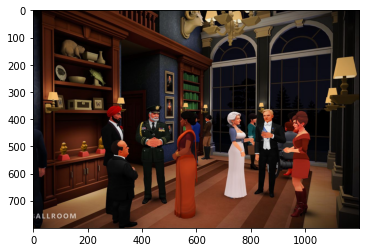

In [333]:
plt.imshow(new_image)

In [334]:
"""
Resizing the image
"""

s = 10
w = int(new_image.shape[1]*s/100)
h = int(new_image.shape[0]*s/100)
dim = (w,h)

resize = cv2.resize(new_image, dim, interpolation = cv2.INTER_AREA)

resize.shape


(80, 120, 3)

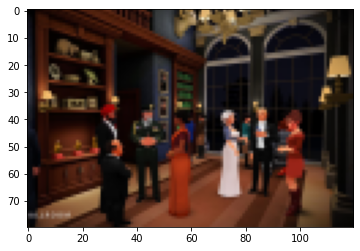

In [335]:
plt.imshow(resize)

In [336]:
"""
rotation
"""
(h, w) = new_image.shape[:2]

In [337]:
c = (w / 2, h / 2)
angle = 90

m = cv2.getRotationMatrix2D(c, angle, 1.0)

rotate_90 = cv2.warpAffine(new_image, m, (w, h))

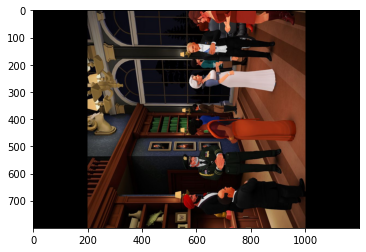

In [338]:
plt.imshow(rotate_90)

In [647]:
yolo = cv2.dnn.readNet("./yolov3-416.weights", "./yolov3.cfg")

In [648]:
classes = []
with open("./coco.names", "r") as f:
    classes = f.read().splitlines()

In [649]:
len(classes)

80

In [757]:
img = cv2.imread("./high_rise.jpeg")

In [758]:
img.shape

(720, 1280, 3)

In [759]:
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (825, 825), swapRB=True, crop=False)

In [760]:
blob.shape

(1, 3, 825, 825)

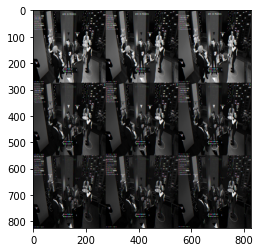

In [761]:
# to print image
i = blob[0].reshape(825, 825, 3)
plt.imshow(i)

In [762]:
yolo.setInput(blob)

In [763]:
output_layer_names = yolo.getUnconnectedOutLayersNames()

In [764]:
layeroutput = yolo.forward(output_layer_names)

In [765]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.9:
            center_x = int(detection[0] * img.shape[1])
            center_y = int(detection[1] * img.shape[0])
            w = int(detection[2] * img.shape[1])
            h = int(detection[3] * img.shape[0])
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [766]:
len(boxes)


12

In [767]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.9, 1.0)

In [768]:
indexes

array([ 1,  5,  6,  2, 10,  9, 11,  4,  0,  3,  7,  8], dtype=int32)

In [769]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(boxes), 3))

In [770]:
for i in indexes.flatten():
    x, y, w, h = boxes[i]

    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color = colors[i]

    cv2.rectangle(img, (x, y), (x + w, y + h), color, 3)
    cv2.putText(img, label + " " + confi, (x, y + 20), font, 2, (255, 255, 255), 2)

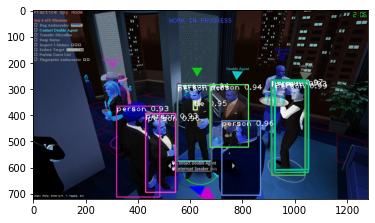

In [771]:

plt.imshow(img)

In [772]:
# save the image
cv2.imwrite("./detection.jpg", img)

True